# how predictors are trained

Averaging: Train predictors in parallel and average the scores of the individual predictors

Boosting: Train predictorrs in sequence where each predictor learns from their earlier mistake

# ensemble
voting and stacking: refer to how the individual predcictions from individual learners are combined together to get final prediction

voting: majority vote of the individual predictors is the final prediction of the ensemble

stacking: train an additional ml model to take the op of individual output and then use ml to get final output

"fit a model on the individul predictions to get the final prediction of the ensemble"

# Individual techniques to train the models in ensemble 
Averaging: trains multiple learners in parallel. get each individual prediction from each learner. final prediction of the ensemble is average of the  individual predictions

# Training the individual learners

Bagging: sample data with replacement (already sampled before are put back)

pasting: sample data without replacement

boosting: train multiple learners sequentially and 
each model learna from the mistake made by previous model....thus the model has to be completed only then it will go to next model..w.e
can tweak the learning rate, scale less well, boost accuracy

# BOOST
Adaptive boost--> ada boost --> each model pays more attention to training instances the previous model got wrong.

GB: every model in sequence fits on residual errors of the previous model

# how outputs of individual learners are combined
get individual pred from each learners

each learner uses a different training algorithm

they add diversity to the predictions
* Hard voting: final op is the majority vote --> FOR CLASSIFICATION, CATEGORY

* soft voting: final op is the category with highest probability score --> aggregrate prob score for each output category

* stacking: train diverse individual learners, get preds, you fit another ml model(blender model) to make final model


# what kind of individual learner to use?

You can use DT,RF,NN,SVM etc

but should be as different as possible to get great results

Descion Tree are the most common building block for ensemble learning

# how should individula learers be trained
if not DT, then each model has their full conventional method

each tree is iteratively trained on randomly sampled subset based on (bagging,boosting)

OVERFITTING:
causes?

# bias - variance trade off

high variance, low bias error


*bias: low bias -->makes few assumtions about the underlying data

*high bias --> more assumptions about the underlying data (too many assumtions about data -- simple)

*high variance: sensitive to traing data (even for new data huge change in model) --  too complex

*low variance: model dosent change much even if the trainig data is changed


# prevention

Regularization -->penalize complex models --> forces algo to keep model simple

cross validation --> diff subsets of data

dropout --> NN

Ensemble learning --> since we have diverse set of predictors

#CODE STARTS HERE

In [5]:
import sklearn
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

In [6]:

print(sklearn.__version__)

0.22.2.post1


# DATA SOURCE
# https://www.kaggle.com/itsmesunil/bank-loan-modelling

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [8]:
bank_data = pd.read_csv(r'/content/drive/My Drive/Bank_data.csv')
bank_data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [5]:
bank_data.shape


(5000, 14)

In [6]:
bank_data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [7]:
bank_data.info()
# thus there are no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [8]:
bank_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [9]:
bank_data.apply(lambda x: len(x.unique()))

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

Age feature is normally distributed with majority of customers falling between 30 years and 60 years of age. We can confirm this by looking at the describe statement above, which shows mean is almost equal to median

Experience is normally distributed with more customer having experience starting from 8 years. Here the mean is equal to median. There are negative values in the Experience. This could be a data input error as in general it is not possible to measure negative years of experience. We can delete these values, because we have 3 or 4 records from the sample.

Income is positively skewed. Majority of the customers have income between 45K and 55K. We can confirm this by saying the mean is greater than the median

CCAvg is also a positively skewed variable and average spending is between 0K to 10K and majority spends less than 2.5K

Mortgage 70% of the individuals have a mortgage of less than 40K. However the max value is 635K

The variables family and education are ordinal variables. The distribution of families is evenly distributes

### check if there are negative experiences which is not possible at all

In [10]:
# there are 52 records with negative experience. Before proceeding any further we need to clean the same
bank_data[bank_data['Experience'] < 0]['Experience'].count()

52

In [11]:
#clean the negative variable
dfExp = bank_data.loc[bank_data['Experience'] >0]
negExp = bank_data.Experience < 0
column_name = 'Experience'
mylistindex = bank_data.loc[negExp].index.tolist()
mylist = bank_data.loc[negExp]['ID'].tolist() # getting the customer ID who has negative experience

In [12]:
print(mylist)

[90, 227, 316, 452, 525, 537, 541, 577, 584, 598, 650, 671, 687, 794, 890, 910, 1174, 1429, 1523, 1906, 2103, 2431, 2467, 2546, 2619, 2718, 2849, 2877, 2963, 2981, 3077, 3131, 3158, 3280, 3285, 3293, 3395, 3426, 3627, 3797, 3825, 3888, 3947, 4016, 4089, 4117, 4286, 4412, 4482, 4515, 4583, 4958]


In [13]:
# there are 52 records with negative experience
negExp.value_counts()

False    4948
True       52
Name: Experience, dtype: int64

In [14]:
#for id in mylist:
    #age = bank_data.loc[np.where(bank_data['ID']==id)]    # this will print all the details of the customer with "id" who of the customer who has -ve experince
    #age = bank_data.loc[np.where(bank_data['ID']==id)]["Age"].tolist()         # this will have [25][26][21]...
    #age = bank_data.loc[np.where(bank_data['ID']==id)]["Age"].tolist()[0]      # this will have 25 26 21...
    #print(age)

In [15]:
# https://www.kdnuggets.com/2019/06/select-rows-columns-pandas.html
# https://www.kdnuggets.com/2017/01/pandas-cheat-sheet.html

The following code does the below steps:

For the record with the ID, get the value of Age column
For the record with the ID, get the value of Education column
Filter the records matching the above criteria from the data frame which has records with positive experience and take the median
Apply the median back to the location which had negative experience

In [14]:
for id in mylist:
    age = bank_data.loc[np.where(bank_data['ID']==id)]["Age"].tolist()[0]
    education = bank_data.loc[np.where(bank_data['ID']==id)]["Education"].tolist()[0]
    df_filtered = dfExp[(dfExp.Age == age) & (dfExp.Education == education)] # find customer with same age and same exp of the whole dataset # read above text
    exp = df_filtered['Experience'].median()
    bank_data.loc[bank_data.loc[np.where(bank_data['ID']==id)].index, 'Experience'] = exp # find index, experience alone and then replace them with exp

In [15]:
# checking after imputing medians if there are records with negative experience
bank_data[bank_data['Experience'] < 0]['Experience'].count()

0

In [16]:
bank_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,4971.0,20.243211,11.359189,0.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


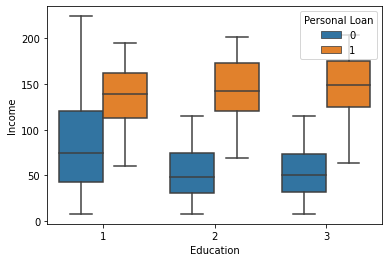

In [17]:
# Influence of income and education on personal loan
sns.boxplot(x='Education',y='Income',hue='Personal Loan',data=bank_data)
# Observation : It seems the customers whose education level is 1 is having more income.
# However customers who has taken the personal loan have the same income levels

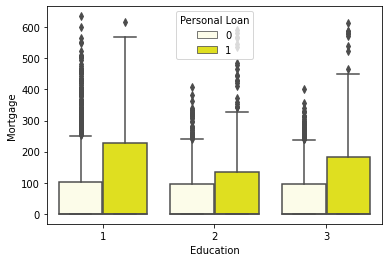

In [20]:
sns.boxplot(x="Education", y='Mortgage', hue="Personal Loan", data=bank_data,color='yellow')

### Inference : From the above chart it seems that customer who do not have personal loan and customer who has personal loan have high mortgage

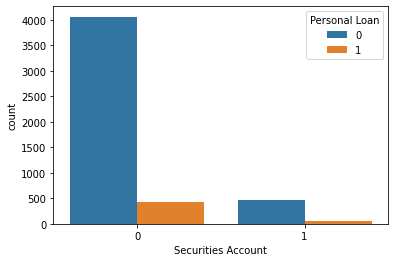

In [21]:
sns.countplot(x="Securities Account", data=bank_data,hue="Personal Loan")
# Observation : Majority of customers who does not have loan have securities account

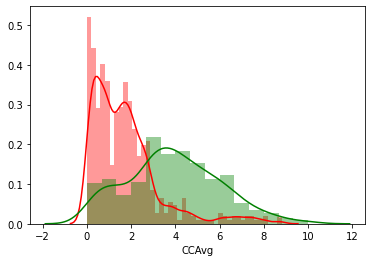

In [25]:
sns.distplot( bank_data[bank_data['Personal Loan'] == 0]['CCAvg'], color = 'r')
sns.distplot( bank_data[bank_data['Personal Loan'] == 1]['CCAvg'], color = 'g')

In [26]:
print('Credit card spending of Non-Loan customers: ',bank_data[bank_data['Personal Loan'] == 0]['CCAvg'].median()*1000)
print('Credit card spending of Loan customers    : ', bank_data[bank_data['Personal Loan'] == 1]['CCAvg'].median()*1000)

Credit card spending of Non-Loan customers:  1400.0
Credit card spending of Loan customers    :  3800.0


Observation: The graph show persons who have personal loan have a higher credit card average. Average credit card spending with a median of 3800 dollar indicates a higher probability of personal loan. Lower credit card spending with a median of 1400 dollars is less likely to take a loan. This could be useful information.

Text(0, 0.5, 'Age')

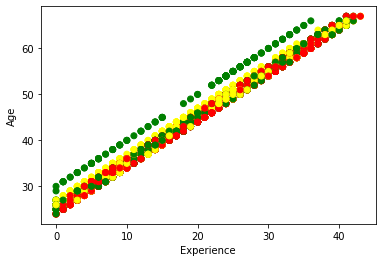

In [27]:
fig, ax = plt.subplots()
colors = {1:'red',2:'yellow',3:'green'}
ax.scatter(bank_data['Experience'],bank_data['Age'],c=bank_data['Education'].apply(lambda x:colors[x]))
plt.xlabel('Experience')
plt.ylabel('Age')

Observation The above plot show with experience and age have a positive correlation. As experience increase age also increases. Also the colors show the education level. There is gap in the mid forties of age and also more people in the under graduate level

Text(0, 0.5, 'CredirCard')

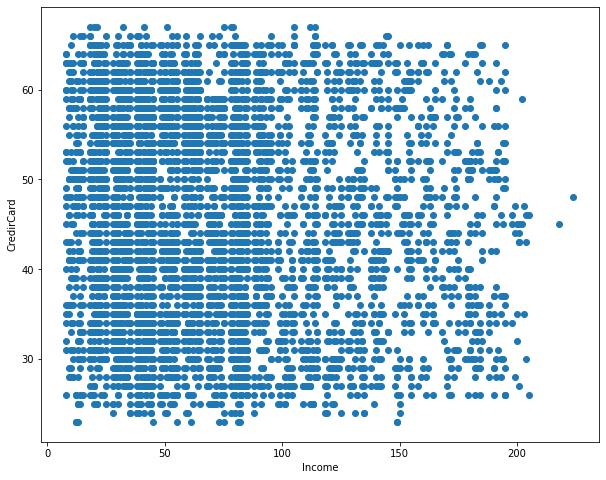

In [28]:
fig, ax = plt.subplots(figsize = (10,8))
plt.scatter( bank_data['Income'], bank_data['Age'])

plt.xlabel('Income')
plt.ylabel('CredirCard')

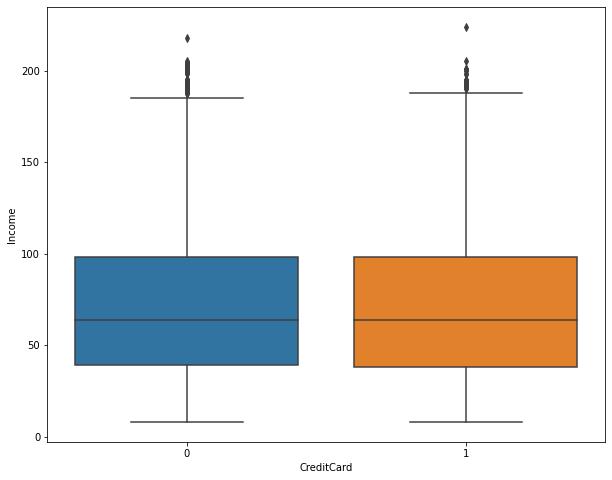

In [29]:
# try for a diff visulaization since the above as no visual patterns
fig, ax = plt.subplots(figsize=(10,8))
sns.boxplot(bank_data['CreditCard'], bank_data['Income'])

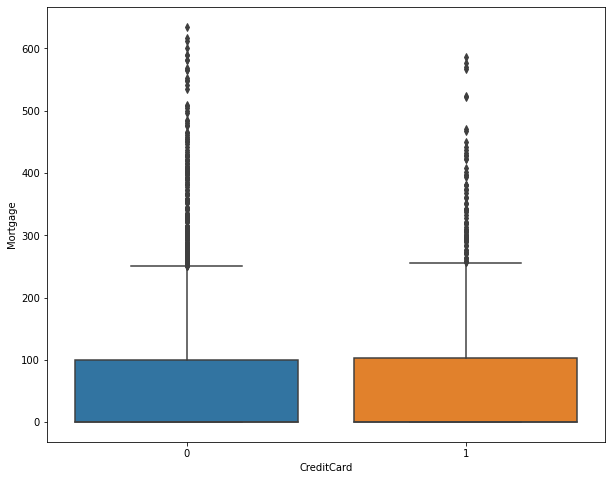

In [30]:
fig, ax = plt.subplots(figsize = (10, 8))
sns.boxplot(bank_data['CreditCard'], bank_data['Mortgage'])

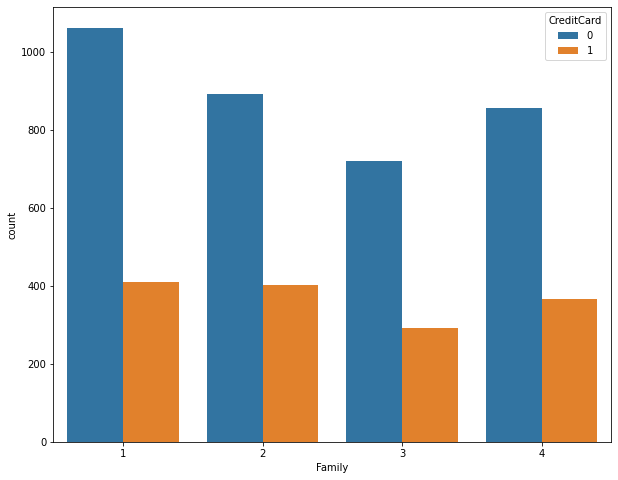

In [31]:
fig, ax = plt.subplots(figsize = (10, 8))
sns.countplot(x='Family', data = bank_data, hue='CreditCard')

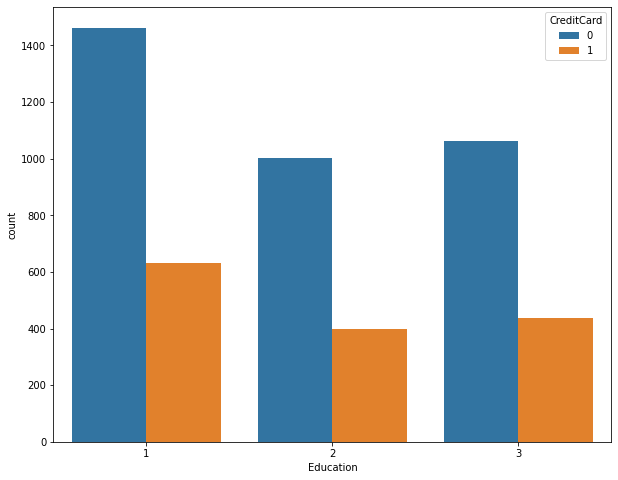

In [32]:
fig, ax = plt.subplots(figsize = (10, 8))
sns.countplot(x='Education', data = bank_data, hue='CreditCard')

In [33]:
bank_data_corr = bank_data.corr()
bank_data_corr

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,1.000000,-0.008473,-0.009308,-0.017695,0.013432,-0.016797,-0.024675,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.994159,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.009308,0.994159,1.000000,-0.048095,-0.030649,-0.049420,-0.047694,0.013075,-0.012935,-0.011498,0.001059,0.007381,0.014501,0.007935
Income,-0.017695,-0.055269,-0.048095,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,0.013432,-0.029216,-0.030649,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.016797,-0.046418,-0.049420,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.024675,-0.052012,-0.047694,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.021463,0.041334,0.013075,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.013920,-0.012539,-0.012935,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.024801,-0.007726,-0.011498,0.502462,0.000107,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802


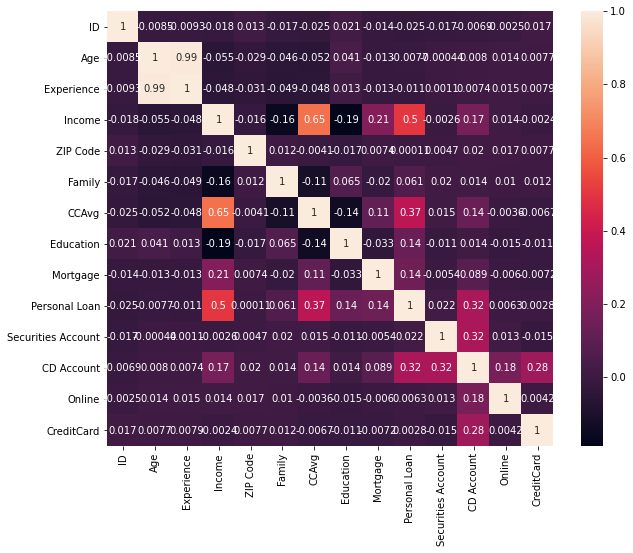

In [34]:
fig, ax = plt.subplots(figsize = (10, 8))
sns.heatmap(bank_data_corr, annot=True)

In [18]:
x = bank_data.drop('CreditCard', axis=1)
y= bank_data['CreditCard']

In [19]:
x.drop(['ID','Experience', 'ZIP Code'], axis=1, inplace=True)
x.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online
0,25,49,4,1.6,1,0,0,1,0,0
1,45,34,3,1.5,1,0,0,1,0,0
2,39,11,1,1.0,1,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,0


In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3 , random_state=100)

In [21]:
x_train.shape

(3500, 10)

In [23]:
from sklearn.ensemble import VotingClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.svm import  SVC
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

# Hard Voting

In [24]:
# Hard voting
log_clf = LogisticRegression(C=1, solver='liblinear') # C is regularisation strength

svc_clf = SVC(C=1, kernel='linear', gamma='auto')

naive_clf = GaussianNB()

In [25]:
for clf in (log_clf, svc_clf, naive_clf):

  clf.fit(x_train,y_train)
  y_pred = clf.predict(x_test)
  print(accuracy_score(y_test, y_pred))

0.7626666666666667
0.7613333333333333
0.7613333333333333


In [29]:
voting_clf_hard = VotingClassifier(estimators=[('lr', log_clf),
                                                ('svc', svc_clf),
                                                ('naive', naive_clf)], voting='hard')

In [30]:
voting_clf_hard.estimators

[('lr',
  LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                     intercept_scaling=1, l1_ratio=None, max_iter=100,
                     multi_class='auto', n_jobs=None, penalty='l2',
                     random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                     warm_start=False)),
 ('svc',
  SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
      decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
      max_iter=-1, probability=False, random_state=None, shrinking=True,
      tol=0.001, verbose=False)),
 ('naive', GaussianNB(priors=None, var_smoothing=1e-09))]

In [31]:
voting_clf_hard.named_estimators

{'lr': LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=100,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                    warm_start=False),
 'naive': GaussianNB(priors=None, var_smoothing=1e-09),
 'svc': SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
     decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
     max_iter=-1, probability=False, random_state=None, shrinking=True,
     tol=0.001, verbose=False)}

In [32]:
voting_clf_hard.fit(x_train, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='liblinear', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('svc',
                              SVC(C=1, break_ties=False, cache_size=200,
                                  class_weight=None, coef0=0.0,
                                  decision_function_shape='ovr', degree=3,
                                  gamma

In [33]:
y_pred = voting_clf_hard.predict(x_test)

In [34]:
accuracy_score(y_test, y_pred)

0.7613333333333333

In [35]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.98      0.86      1080
           1       0.81      0.19      0.31       420

    accuracy                           0.76      1500
   macro avg       0.78      0.59      0.58      1500
weighted avg       0.77      0.76      0.70      1500



In [36]:
print(confusion_matrix(y_test, y_pred))

[[1061   19]
 [ 339   81]]


#**SOFT VOTING**

In [26]:
y_pred_probs = log_clf.predict_proba(x_test)

y_pred_probs[:10]
# credit card issued, not issued

array([[0.69185672, 0.30814328],
       [0.7177643 , 0.2822357 ],
       [0.63763177, 0.36236823],
       [0.71484387, 0.28515613],
       [0.6864917 , 0.3135083 ],
       [0.86525107, 0.13474893],
       [0.69364941, 0.30635059],
       [0.74220654, 0.25779346],
       [0.72661533, 0.27338467],
       [0.70705313, 0.29294687]])

In [27]:
y_pred_probs = naive_clf.predict_proba(x_test)

y_pred_probs[:10]
# credit card issued, not issued

array([[0.84062955, 0.15937045],
       [0.86764093, 0.13235907],
       [0.84319449, 0.15680551],
       [0.85079858, 0.14920142],
       [0.86094191, 0.13905809],
       [0.87080886, 0.12919114],
       [0.87662236, 0.12337764],
       [0.86483783, 0.13516217],
       [0.8537832 , 0.1462168 ],
       [0.84647244, 0.15352756]])

In [28]:
svc_clf = SVC(C=1, kernel='linear', gamma='auto', probability=True)


In [29]:
voting_clf_soft =  VotingClassifier(estimators=[('lr', log_clf),
                                                ('svc', svc_clf),
                                                ('naive', naive_clf)], voting='soft',
                                    weights=[0.40, 0.30, 0.30]) # assign higher weights to the one u know will perform well 

In [30]:
voting_clf_soft.fit(x_train, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='liblinear', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('svc',
                              SVC(C=1, break_ties=False, cache_size=200,
                                  class_weight=None, coef0=0.0,
                                  decision_function_shape='ovr', degree=3,
                                  gamma

In [31]:
y_pred = voting_clf_soft.predict(x_test)
accuracy_score(y_test, y_pred)

0.7613333333333333

#**AVERAGING METHODS**

### individual learners are independent of other learners and they can be trained in parallel

### oob_score = True --> {out of bag training samples}

#**EXTRA TREES**

##Extremely randomized trees or Extra trees:

An ensemble of descision trees in which the individual trees are trained on differnt random subsets of features in the training data
using random split points( rather than finding best thresholds) (select threshold at random)

Averaging  vs Boosting

A: indvi learners are independent

B: indvi learnes are linked to prev learners

A: built parallel

B: build each model sequentioally (not scalable)

A: not learn from mistakes

B: learn from mistakes

#**BAGGING AND PASTING CLASSIFICATION**

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

In [34]:
bag_clf =  BaggingClassifier(DecisionTreeClassifier(), n_estimators= 500, 
                            bootstrap= False,  # sample without replacement (False --> pasting)
                            max_samples = 1.0, # draw entire samples
                            n_jobs = -1) 

In [35]:
bag_clf.fit(x_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=None,


In [36]:
y_pred = bag_clf.predict(x_test)

In [37]:
accuracy_score(y_test, y_pred)
# note it did not perform well

0.642

#**BAGGING**

In [38]:
bag_clf  = BaggingClassifier(DecisionTreeClassifier(), n_estimators= 500, 
                            bootstrap= True,  # sample with replacement (Fasle --> pasting)
                            max_samples = 0.8, # draw entire samples
                            n_jobs = -1,
                            oob_score = True) # out of bag evaluation (instances not used in training are used after trainig )

In [39]:
bag_clf.fit(x_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=None,


In [40]:
y_pred = bag_clf.predict(x_test)
bag_clf.oob_score_ # note this

0.6897142857142857

In [41]:
accuracy_score(y_test,y_pred)

0.712

#**RANDOM PATCHES**

In [42]:
bag_clf  = BaggingClassifier(DecisionTreeClassifier(), n_estimators= 400, 
                            bootstrap= False,  # sample without replacement (Fasle --> pasting)
                            max_samples = 100, ########################### note this refers to actual no of samples
                            n_jobs = -1,
                            bootstrap_features = True,
                            max_features = 0.8) # out of bag evaluation (instances not used in training are used after trainig )

In [43]:
bag_clf.fit(x_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=None,


In [44]:
y_pred = bag_clf.predict(x_test)

In [45]:
accuracy_score(y_test, y_pred)

0.7633333333333333

#**ADABOOST CLASSIFIER**

In [46]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [47]:
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), # 1 descision node and 2 leaf nodes (if max_depth = 1, they are called decision stumps)
                             n_estimators=100,
                             algorithm='SAMME', # stagewise additive modelling using a multiclass exponential loss fucn
                             learning_rate = 1.0)
ada_clf.fit(x_train, y_train)

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=1,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                            

In [48]:
ada_clf.estimator_weights_
# later estimators have lower weight
# same --> predicted calss receive majority votes from individual learners

array([1.01062711, 0.17373972, 0.1108344 , 0.09381154, 0.07772636,
       0.08896094, 0.13053005, 0.11050263, 0.04854838, 0.07119827,
       0.10978966, 0.10235406, 0.10900959, 0.08358942, 0.09079801,
       0.07764134, 0.06544164, 0.02752157, 0.03711029, 0.07759251,
       0.07720458, 0.06502406, 0.03056272, 0.0096996 , 0.01454728,
       0.0234928 , 0.00934163, 0.00927212, 0.00920331, 0.00913521,
       0.00906781, 0.00900108, 0.00893503, 0.00886964, 0.0088049 ,
       0.01341042, 0.05452407, 0.07710683, 0.03391017, 0.02172917,
       0.04921313, 0.05067708, 0.02237492, 0.00779324, 0.00773855,
       0.00768437, 0.00763068, 0.00757747, 0.00752474, 0.00747249,
       0.01173812, 0.01861881, 0.00721159, 0.0071621 , 0.00711304,
       0.00706441, 0.00701619, 0.00696839, 0.006921  , 0.00687402,
       0.00682743, 0.00678124, 0.00673544, 0.01082459, 0.01701918,
       0.00650326, 0.00645977, 0.00641665, 0.01325575, 0.04062538,
       0.04915149, 0.02331612, 0.00650843, 0.00646505, 0.00642

In [49]:
y_pred = ada_clf.predict(x_test)
accuracy_score(y_test, y_pred)

0.7633333333333333

In [50]:
new_ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),
                                 n_estimators=100,
                                 algorithm='SAMME.R', # R is real, theu use class probability rather than prediction of weak learners directly
                                 learning_rate=0.25) # we have used 1/4, since it resulted in better acc than 1/2
new_ada_clf.fit(x_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=1,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                          

In [51]:
y_pred = new_ada_clf.predict(x_test)
accuracy_score(y_test, y_pred)

0.7633333333333333

#**GRADIENT BOOSTING**

also uses weak learners
individual learners learn from "residual" error of the prev learners

eg) y = a1 + b1x + e1  -->model1
so,the error e1 = a2 + b2x +e2  --> for model2
now, e2 = a3 + b3x + e3 --> model3

finally, y = a1 +a1+a3 + (b1+b2+b3)x + e3
y= sum of output of weak learners

thus the ensemble of all the residual erros are used again to train the model

#**MODEL STACKING ENSEMBLE**

### trainset, holdoutset, testset

## STACK GENERALISATION: how should individual learners be combined to give final output? (voting, stacking)

### trains an additional model
### This final model is trained on the predictions of the individual learner --> Metalearner or Blender model


In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.linear_model import LogisticRegression # here our meta learner is logistic regression (note although name is regression it is classification)


In [52]:
# basically outputs from knn,nb,rf are used to train the LR

x_train, x_holdout, x_test = np.split(x, [int(.7*len(x)), int(.9*len(x))])

y_train, y_holdout, y_test = np.split(y, [int(.7*len(y)), int(.9*len(y))])

### 70 % to train the predictors of 1st layer
### 20 % (HOLDOUT) used by first layer predictions to make predictions
### the output of these 20% above are given as input to the BLENDER model
### the 10 % remaining is what we use to test the BLENDER 

In [53]:
y_train.shape, y_holdout.shape, y_test.shape

((3500,), (1000,), (500,))

In [54]:

clf1 = KNeighborsClassifier(n_neighbors=10)
clf2 = RandomForestClassifier(n_estimators=50)
clf3 = GaussianNB()

for clf in (clf1,clf2,clf3):
  clf.fit(x_train,y_train)  # 70% data used

In [55]:
from sklearn.metrics import accuracy_score

## Helper functions

In [56]:
def get_predictions(X,y): # holdout data we pass in
  pred_result = pd.DataFrame()

  i = 1
  for clf in (clf1, clf2, clf3):

    y_pred = clf.predict(X)

    print(clf.__class__.__name__,accuracy_score(y,y_pred))

    pred_result.insert(i-1, 'y_pred_' + str(i), y_pred) # insert pred result from each classifier as a column, i is column number

    i += 1

  return pred_result


In [57]:
pred_result = get_predictions(x_holdout, y_holdout)
pred_result.head()

KNeighborsClassifier 0.687
RandomForestClassifier 0.686
GaussianNB 0.749


,y_pred_1,y_pred_2,y_pred_3
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


#### this is the training x values --> train data for logistic regression (blender model in our case) 

In [58]:
x_stack_train = pred_result

y_stack_train = y_holdout # y holdout we split earlier

In [59]:
x_stack_train

,y_pred_1,y_pred_2,y_pred_3
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
995,0,0,0
996,0,0,0
997,0,0,0
998,0,0,0


In [60]:
y_stack_train.shape

(1000,)

#** Our Blender Model**

In [61]:
clf_stack = LogisticRegression(solver='lbfgs', C=1 , max_iter=200)

clf_stack.fit(x_stack_train, y_stack_train) # note its is x_stack_train

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [62]:
pred_result_test = get_predictions(x_test, y_test)

KNeighborsClassifier 0.674
RandomForestClassifier 0.69
GaussianNB 0.734


# 1st step: is to get predictions from our 1st layer models, we need thee because these predictions are what we will use to feed into our blender

In [63]:
x_stack_test = pred_result_test
x_stack_test.shape

# note: shape is 500 (10%)

(500, 3)

In [64]:
y_stack_pred = clf_stack.predict(x_stack_test)

In [65]:
accuracy_score(y_stack_pred, y_test) # note the names

0.734